In [ ]:
#import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import the csv file into workspace
train=pd.read_csv('/content/drive/MyDrive/dataset/train.csv')
train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [ ]:
train.dtypes

Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

In [ ]:
#Check for NULL values in the dataset ---> ColumnWise
train.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

#Handling The Missing/Null Values


In [ ]:
#No Null values in Employee ID column
train['Employee ID'].value_counts()

fffe32003000360033003200    1
fffe3600360035003500        1
fffe3800360034003400        1
fffe31003000310033003600    1
fffe31003400350031003700    1
                           ..
fffe33003400340032003400    1
fffe32003100370036003600    1
fffe31003900310035003800    1
fffe32003400320034003200    1
fffe3400350031003800        1
Name: Employee ID, Length: 22750, dtype: int64

In [ ]:
train['Resource Allocation'].value_counts()

4.0     3893
5.0     3861
3.0     3192
6.0     2943
2.0     2075
7.0     1965
1.0     1791
8.0     1044
9.0      446
10.0     159
Name: Resource Allocation, dtype: int64

In [ ]:
train['Resource Allocation'].fillna(train['Resource Allocation'].mean(), inplace = True)

In [ ]:
train['Mental Fatigue Score'].value_counts()

6.0    470
5.8    464
5.9    458
6.1    457
6.3    454
      ... 
0.5     24
0.2     23
0.4     19
0.1     17
0.3     13
Name: Mental Fatigue Score, Length: 101, dtype: int64

In [ ]:
train['Mental Fatigue Score'].fillna(train['Mental Fatigue Score'].mean(), inplace = True)

In [ ]:
train['Burn Rate'].value_counts()

0.47    475
0.43    444
0.41    434
0.45    431
0.50    428
       ... 
0.98     18
0.97     17
0.95     17
0.96     13
0.99      8
Name: Burn Rate, Length: 101, dtype: int64

In [ ]:
train['Burn Rate'].fillna(train['Burn Rate'].mean(), inplace = True)

In [ ]:
# Handled Null Values completely with the mean of the corresponding columns or attributes
train.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

#Data Visualisation

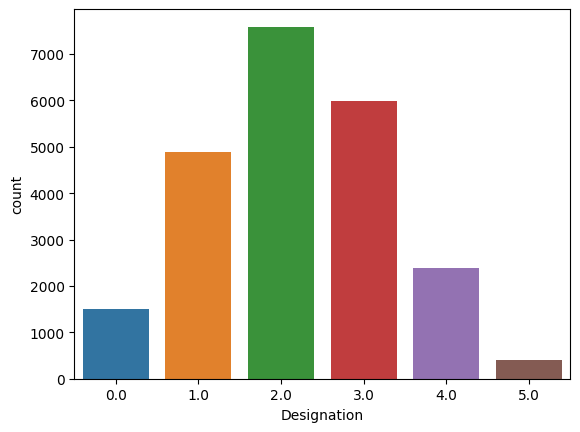

In [ ]:
# Visualising Designation attribute

ax = sns.countplot(x="Designation", data=train)

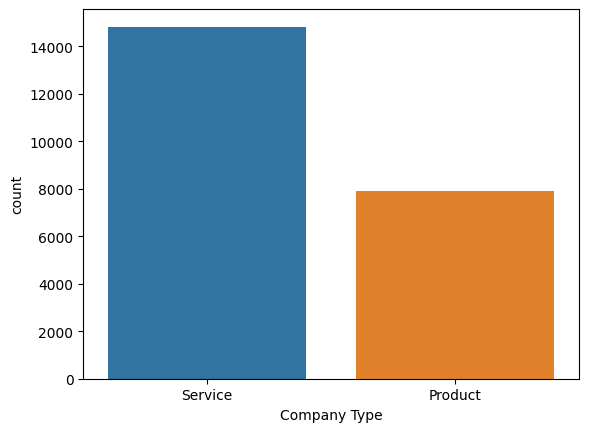

In [ ]:
# Visualising Company Type

ax = sns.countplot(x="Company Type", data=train)

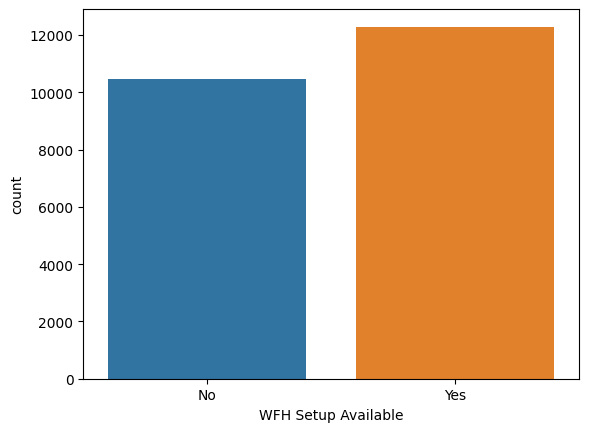

In [ ]:
# Visualising WFH SetUp

ax = sns.countplot(x="WFH Setup Available", data=train)

<Axes: xlabel='Designation', ylabel='Mental Fatigue Score'>

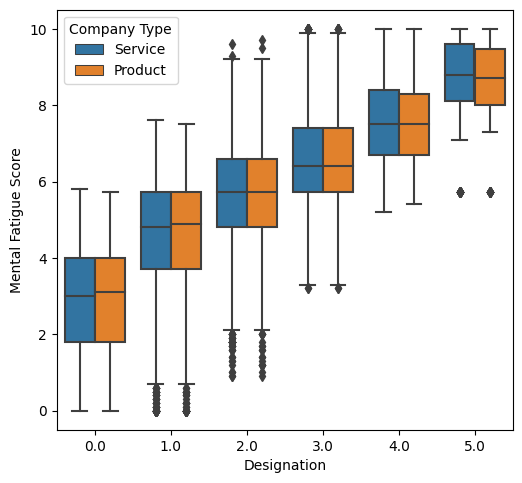

In [ ]:
# Box plot of Mental Fatigue, Designation

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Designation', y = 'Mental Fatigue Score',hue='Company Type',data = train)

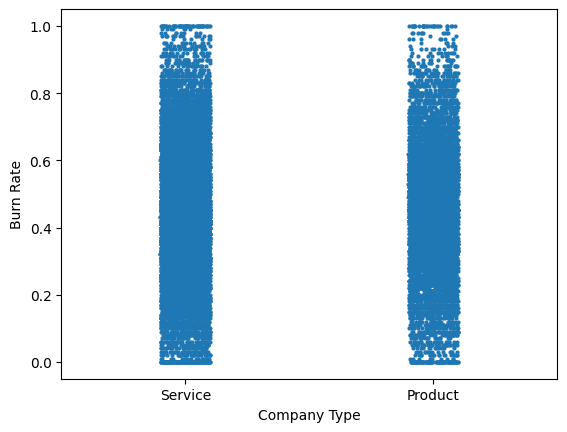

<Figure size 1000x500 with 0 Axes>

In [ ]:
# Strip Plot of Company type and Burn Rate
sns.stripplot(x = "Company Type", y = "Burn Rate",data = train,size=3)
plt.figure(figsize=(10,5))
plt.show()

<Axes: xlabel='Gender', ylabel='Burn Rate'>

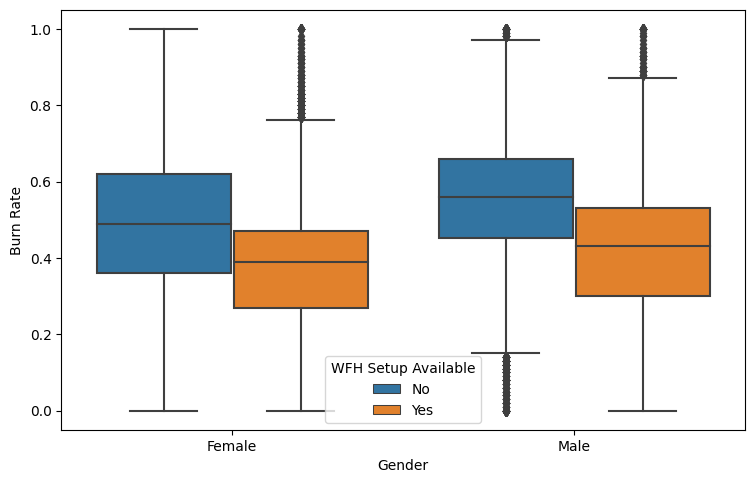

In [ ]:
plt.figure(figsize=(30, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Gender', y = 'Burn Rate',hue='WFH Setup Available',data = train)

#Feature Engineering

In [ ]:
# Here, Gender attribute is feature engineered as Female or Male ---> 0 or 1

one_hot = pd.get_dummies(train['Gender'])
train = train.drop('Gender',axis = 1)
train =train.join(one_hot)

In [ ]:
#Like above Company type is changed to Product or Service type
one_hot = pd.get_dummies(train['Company Type'])
train = train.drop('Company Type',axis = 1)
train =train.join(one_hot)

In [ ]:
#WFH SetUp is changed intp Yes or No
one_hot = pd.get_dummies(train['WFH Setup Available'])
train = train.drop('WFH Setup Available',axis = 1)
train =train.join(one_hot)

In [ ]:
train.head()

,Employee ID,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Female,Male,Product,Service,No,Yes
0,fffe32003000360033003200,2008-09-30,2.0,3.000000,3.8,0.16,1,0,0,1,1,0
1,fffe3700360033003500,2008-11-30,1.0,2.000000,5.0,0.36,0,1,0,1,0,1
2,fffe31003300320037003900,2008-03-10,2.0,4.481398,5.8,0.49,1,0,1,0,0,1
3,fffe32003400380032003900,2008-11-03,1.0,1.000000,2.6,0.20,0,1,0,1,0,1
4,fffe31003900340031003600,2008-07-24,3.0,7.000000,6.9,0.52,1,0,0,1,1,0


<ipython-input-24-fdc2d3db8237>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=(train.corr())


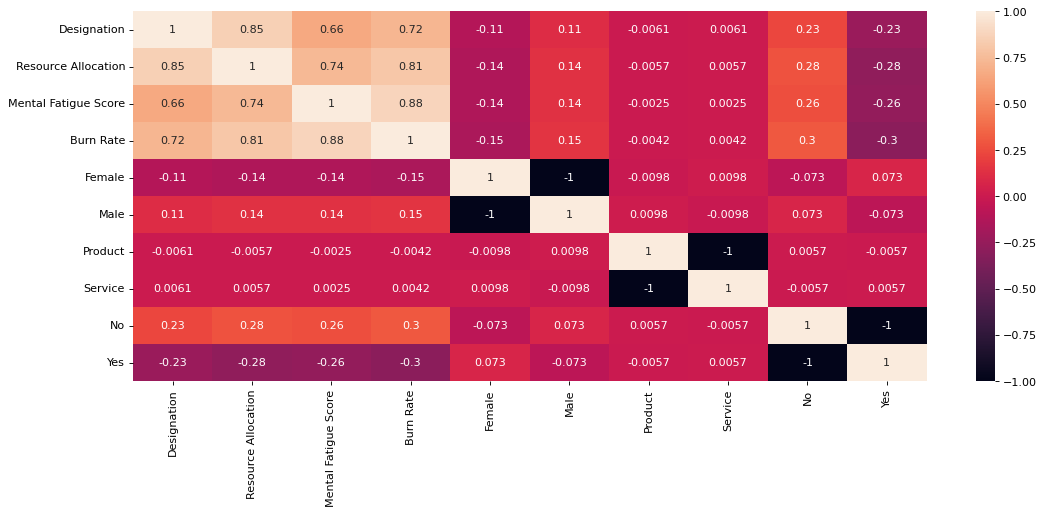

In [ ]:
cor=(train.corr())
plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(cor, annot=True)
plt.show()

The variable 'Resource Allocation' is having high correlation with other independent variables(Designation,Resource Allocation Mental Fatigue Score) so we will drop the column

In [ ]:
#Removing Resource Allocation
train=train.drop(['Resource Allocation'], axis = 1)

Since Employee ID acts a key(unique value) setting Employee ID as index



In [ ]:
# set Emp ID as index
train.set_index('Employee ID',inplace=True)
train.head()

,Date of Joining,Designation,Mental Fatigue Score,Burn Rate,Female,Male,Product,Service,No,Yes
Employee ID,,,,,,,,,,
fffe32003000360033003200,2008-09-30,2.0,3.8,0.16,1,0,0,1,1,0
fffe3700360033003500,2008-11-30,1.0,5.0,0.36,0,1,0,1,0,1
fffe31003300320037003900,2008-03-10,2.0,5.8,0.49,1,0,1,0,0,1
fffe32003400380032003900,2008-11-03,1.0,2.6,0.20,0,1,0,1,0,1
fffe31003900340031003600,2008-07-24,3.0,6.9,0.52,1,0,0,1,1,0


In [ ]:
train.head()

,Date of Joining,Designation,Mental Fatigue Score,Burn Rate,Female,Male,Product,Service,No,Yes
Employee ID,,,,,,,,,,
fffe32003000360033003200,2008-09-30,2.0,3.8,0.16,1,0,0,1,1,0
fffe3700360033003500,2008-11-30,1.0,5.0,0.36,0,1,0,1,0,1
fffe31003300320037003900,2008-03-10,2.0,5.8,0.49,1,0,1,0,0,1
fffe32003400380032003900,2008-11-03,1.0,2.6,0.20,0,1,0,1,0,1
fffe31003900340031003600,2008-07-24,3.0,6.9,0.52,1,0,0,1,1,0


In [ ]:
train['Date of Joining'].value_counts()

2008-01-06    86
2008-05-21    85
2008-02-04    82
2008-07-16    81
2008-07-13    80
              ..
2008-06-27    44
2008-07-06    44
2008-07-04    43
2008-12-24    43
2008-12-07    39
Name: Date of Joining, Length: 366, dtype: int64

In [ ]:
#Performing target encoding on Date of Joining attribute
import datetime
train['Date of Joining']= pd.to_datetime(train['Date of Joining'])
train['day'] = train['Date of Joining'].dt.day
train['month'] = train['Date of Joining'].dt.month
train['year'] = train['Date of Joining'].dt.year
train_date_due=train['Date of Joining']
train = train.drop('Date of Joining' , axis = 'columns')

In [ ]:
train_date_due.head()

Employee ID
fffe32003000360033003200   2008-09-30
fffe3700360033003500       2008-11-30
fffe31003300320037003900   2008-03-10
fffe32003400380032003900   2008-11-03
fffe31003900340031003600   2008-07-24
Name: Date of Joining, dtype: datetime64[ns]

In [ ]:
train.head()

,Designation,Mental Fatigue Score,Burn Rate,Female,Male,Product,Service,No,Yes,day,month,year
Employee ID,,,,,,,,,,,,
fffe32003000360033003200,2.0,3.8,0.16,1,0,0,1,1,0,30,9,2008
fffe3700360033003500,1.0,5.0,0.36,0,1,0,1,0,1,30,11,2008
fffe31003300320037003900,2.0,5.8,0.49,1,0,1,0,0,1,10,3,2008
fffe32003400380032003900,1.0,2.6,0.20,0,1,0,1,0,1,3,11,2008
fffe31003900340031003600,3.0,6.9,0.52,1,0,0,1,1,0,24,7,2008


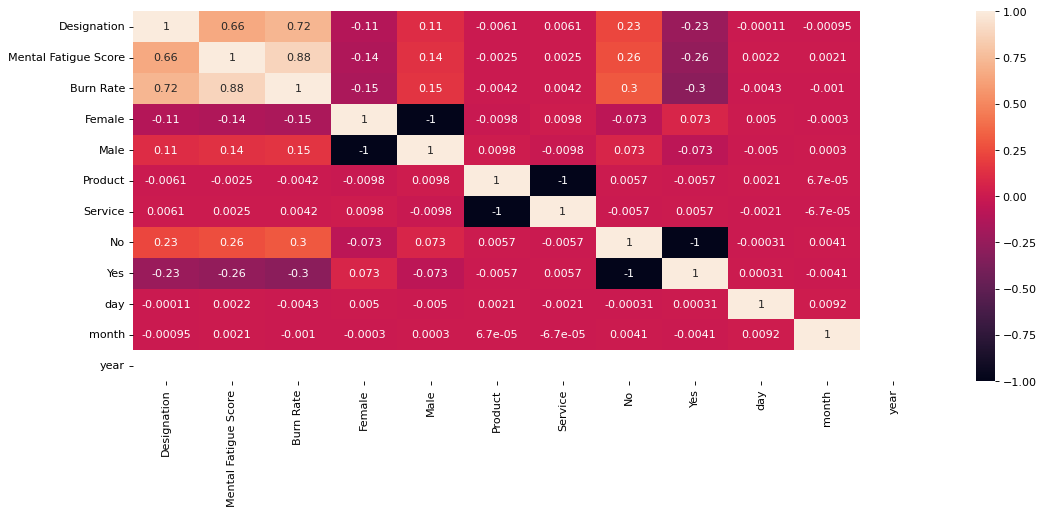

In [ ]:
cor=(train.corr())
plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(cor, annot=True)
plt.show()

The columns Designation and Mental Fatigue Score are linearly related to the Burn Rate



In [ ]:
X=train.drop(['Burn Rate'], axis = 1)
y=train['Burn Rate']
X.head()

,Designation,Mental Fatigue Score,Female,Male,Product,Service,No,Yes,day,month,year
Employee ID,,,,,,,,,,,
fffe32003000360033003200,2.0,3.8,1,0,0,1,1,0,30,9,2008
fffe3700360033003500,1.0,5.0,0,1,0,1,0,1,30,11,2008
fffe31003300320037003900,2.0,5.8,1,0,1,0,0,1,10,3,2008
fffe32003400380032003900,1.0,2.6,0,1,0,1,0,1,3,11,2008
fffe31003900340031003600,3.0,6.9,1,0,0,1,1,0,24,7,2008


In [ ]:
y.head()

Employee ID
fffe32003000360033003200    0.16
fffe3700360033003500        0.36
fffe31003300320037003900    0.49
fffe32003400380032003900    0.20
fffe31003900340031003600    0.52
Name: Burn Rate, dtype: float64

In [ ]:
import statsmodels.api as sm

In [ ]:
#Here, OLS regression technique of linear equations is taken to findout the coefficients
#that best describes the relationship between dependent and independent variables
X_d = sm.add_constant(X)
result = sm.OLS(y, X_d).fit()


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Burn Rate   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                 1.391e+04
Date:                Mon, 31 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:58:49   Log-Likelihood:                 24043.
No. Observations:               22750   AIC:                        -4.807e+04
Df Residuals:                   22742   BIC:                        -4.801e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Designation              0.0416      0.001     63.665      0.000       0.040       0.043
Mental Fatigue Score     0.0739      0.000    180.232      0.000       0.073       0.075
Female                  -0.0043      0.001     -7.564      0.000      -0.005      -0.003
Male                     0.0043      0.001      7.564      0.000       0.003       0.005
Product                 -0.0003      0.001     -0.498      0.619      -0.001       0.001
Service                  0.0003      0.001      0.498      0.619      -0.001       0.001
No                       0.0110      0.001     18.817      0.000       0.010       0.012
Yes                     -0.0110      0.001    -18.817      0.000      -0.012      -0.010
day                     -0.0001   6.36e-05     -1.952      0.051      -0.000    5.31e-07
month                   -0.0001      0.000     -0.847      0.397      -0.000       0.000
year                 -2.906e-05    1.2e-06    -24.205      0.000   -3.14e-05   -2.67e-05
==============================================================================
Omnibus:                     2221.171   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15965.012
Skew:                           0.161   Prob(JB):                         0.00
Kurtosis:                       7.091   Cond. No.                     2.72e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.24e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
X=X.drop(['Product','Service'], axis = 1)
X.head()

,Designation,Mental Fatigue Score,Female,Male,No,Yes,day,month,year
Employee ID,,,,,,,,,
fffe32003000360033003200,2.0,3.8,1,0,1,0,30,9,2008
fffe3700360033003500,1.0,5.0,0,1,0,1,30,11,2008
fffe31003300320037003900,2.0,5.8,1,0,0,1,10,3,2008
fffe32003400380032003900,1.0,2.6,0,1,0,1,3,11,2008
fffe31003900340031003600,3.0,6.9,1,0,1,0,24,7,2008


In [ ]:
X_d = sm.add_constant(X)
result = sm.OLS(y, X_d).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Burn Rate   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                 1.623e+04
Date:                Mon, 31 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:58:54   Log-Likelihood:                 24043.
No. Observations:               22750   AIC:                        -4.807e+04
Df Residuals:                   22743   BIC:                        -4.802e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Designation              0.0416      0.001     63.671      0.000       0.040       0.043
Mental Fatigue Score     0.0739      0.000    180.235      0.000       0.073       0.075
Female                  -0.0043      0.001     -7.559      0.000      -0.005      -0.003
Male                     0.0043      0.001      7.559      0.000       0.003       0.005
No                       0.0110      0.001     18.814      0.000       0.010       0.012
Yes                     -0.0110      0.001    -18.814      0.000      -0.012      -0.010
day                     -0.0001   6.36e-05     -1.953      0.051      -0.000     4.6e-07
month                   -0.0001      0.000     -0.847      0.397      -0.000       0.000
year                 -2.902e-05    1.2e-06    -24.230      0.000   -3.14e-05   -2.67e-05
==============================================================================
Omnibus:                     2221.196   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15969.244
Skew:                           0.161   Prob(JB):                         0.00
Kurtosis:                       7.092   Cond. No.                     2.22e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.86e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
X=X.drop(['month'], axis = 1)
X.head()

,Designation,Mental Fatigue Score,Female,Male,No,Yes,day,year
Employee ID,,,,,,,,
fffe32003000360033003200,2.0,3.8,1,0,1,0,30,2008
fffe3700360033003500,1.0,5.0,0,1,0,1,30,2008
fffe31003300320037003900,2.0,5.8,1,0,0,1,10,2008
fffe32003400380032003900,1.0,2.6,0,1,0,1,3,2008
fffe31003900340031003600,3.0,6.9,1,0,1,0,24,2008


In [ ]:
y.head()

Employee ID
fffe32003000360033003200    0.16
fffe3700360033003500        0.36
fffe31003300320037003900    0.49
fffe32003400380032003900    0.20
fffe31003900340031003600    0.52
Name: Burn Rate, dtype: float64

#EMPLOYEE BURNOUT ANALYSIS

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
X_pca=pca.fit_transform(X)
print("PCA shape of x is: ",X_pca.shape, "and original shape is: ",X.shape)
print("% of importance of selected feature is: ",pca.explained_variance_ratio_)
print("The number of features selected through PCA is: ",pca.n_components_)

PCA shape of x is:  (22750, 2) and original shape is:  (22750, 8)
% of importance of selected feature is:  [0.93177634 0.0494187 ]
The number of features selected through PCA is:  2


In [ ]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
X_train_pca,X_test,Y_train,Y_test=train_test_split(X_pca,y,test_size=0.25,random_state=10)

In [ ]:
print(X_train_pca.shape,X_test.shape,Y_train.shape,Y_test.shape)

(17062, 2) (5688, 2) (17062,) (5688,)


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(X_train_pca,Y_train)
train_pred_rf=rf_model.predict(X_train_pca)
train_r2=r2_score(Y_train,train_pred_rf)
test_pred_rf=rf_model.predict(X_test)
test_r2=r2_score(Y_test,test_pred_rf)
print("Training with RandomForest Regressor")
print("Accuracy score of train data: "+str(round(100*train_r2,4))+" %")
print("Accuracy score of test data: "+str(round(100*test_r2,4))+"%")

Training with RandomForest Regressor
Accuracy score of train data: 93.2567 %
Accuracy score of test data: 78.7588%


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
abr_model=AdaBoostRegressor()
abr_model.fit(X_train_pca,Y_train)
train_pred_adaboost=abr_model.predict(X_train_pca)
train_r2=r2_score(Y_train,train_pred_adaboost)
test_pred_adaboost=abr_model.predict(X_test)
test_r2=r2_score(Y_test,test_pred_adaboost)
print("Training with AdaBoost Regressor: ")
print("Accuracy score of train data: "+str(round(100*train_r2,4))+" %")
print("Accuracy score of test data: "+str(round(100*test_r2,4))+"%")

Training with AdaBoost Regressor: 
Accuracy score of train data: 74.0549 %
Accuracy score of test data: 73.1391%


In [ ]:
from xgboost import XGBRegressor
abr_model=XGBRegressor()
abr_model.fit(X_train_pca,Y_train)
train_pred_adaboost=abr_model.predict(X_train_pca)
train_r2=r2_score(Y_train,train_pred_adaboost)
test_pred_adaboost=abr_model.predict(X_test)
test_r2=r2_score(Y_test,test_pred_adaboost)
print("Training with XGBRegressor: ")
print("Accuracy score of train data: "+str(round(100*train_r2,4))+" %")
print("Accuracy score of test data: "+str(round(100*test_r2,4))+"%")

Training with XGBRegressor: 
Accuracy score of train data: 87.3128 %
Accuracy score of test data: 81.573%


#Through the analysis,We came to know that XGBRegressor is more Accurate.so we trained the dataset with XGBRegressor

##Training with XGBRegressor

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(X,y)
y_pred=model.predict(X)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
val_1_error = mean_squared_error(y, y_pred)
print("RMSE : ", math.sqrt(val_1_error))

RMSE :  0.05754962105269243


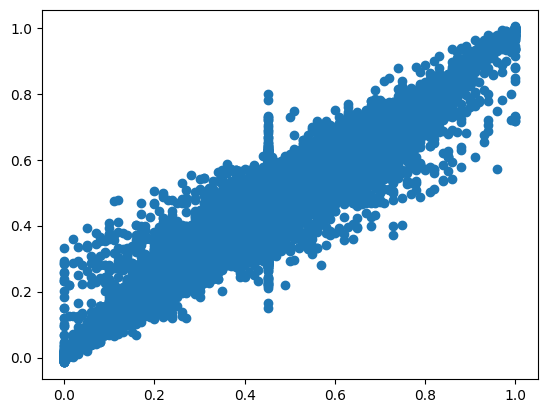

In [ ]:
plt.scatter(y, y_pred)

<ipython-input-52-f2cf236c5c05>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred-y)


<Axes: xlabel='Burn Rate', ylabel='Density'>

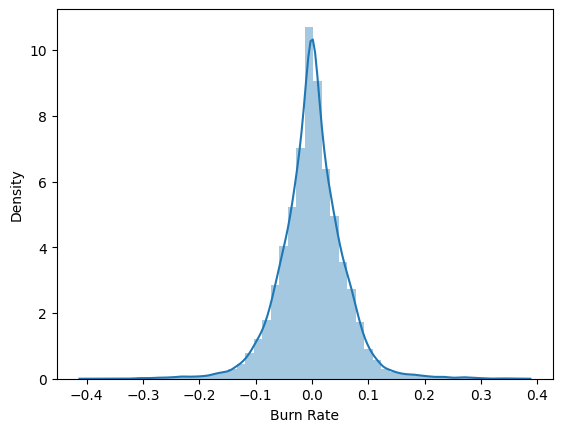

In [ ]:
sns.distplot(y_pred-y)

### Hyper Parameter Tuning Using RandomSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [ ]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
model=XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=2,
             min_child_weight=4,  monotone_constraints='()',
             n_estimators=900, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
model.fit(X,y)

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy=None, importance_type='gain',
             interaction_constraints='', learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
             max_depth=2, max_leaves=None, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=900, n_jobs=8,
             num_parallel_tree=1, predictor=None, random_state=0, ...)

##Predicting the Burn out values for the Test DataSet

In [ ]:
#Test dataset taken from the Kaggle website given to the model trained by the XGBoost Regressor
test=pd.read_csv('/content/drive/MyDrive/dataset/test.csv')
test.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [ ]:
test['Mental Fatigue Score'].fillna(test['Mental Fatigue Score'].mean(), inplace=True)
test['Resource Allocation'].fillna(test['Resource Allocation'].mean(), inplace=True)
test=test.drop(['Resource Allocation'], axis = 1)
test.set_index('Employee ID',inplace=True)

In [ ]:
one_hot = pd.get_dummies(test['Gender'])
test = test.drop('Gender',axis = 1)
test =test.join(one_hot)
one_hot = pd.get_dummies(test['Company Type'])
test = test.drop('Company Type',axis = 1)
test =test.join(one_hot)
one_hot = pd.get_dummies(test['WFH Setup Available'])
test = test.drop('WFH Setup Available',axis = 1)
test =test.join(one_hot)
test=test.drop(['Product','Service'], axis = 1)

In [ ]:
test['Date of Joining']= pd.to_datetime(test['Date of Joining'])
test['day'] = test['Date of Joining'].dt.day
test['month'] = test['Date of Joining'].dt.month
test['year'] = test['Date of Joining'].dt.year
test_date=test['Date of Joining']
test= test.drop('Date of Joining' , axis = 'columns')
test=test.drop(['month'], axis = 1)

In [ ]:
test.head()

,Designation,Mental Fatigue Score,Female,Male,No,Yes,day,year
Employee ID,,,,,,,,
fffe31003300390039003000,2.0,7.7,1,0,1,0,10,2008
fffe31003300310037003800,1.0,5.2,1,0,0,1,14,2008
fffe33003400380035003900,1.0,5.9,0,1,0,1,13,2008
fffe3100370039003200,3.0,4.6,1,0,1,0,7,2008
fffe32003600390036003700,2.0,6.4,1,0,1,0,17,2008


In [ ]:
#Sample Predicted values for the taken test dataset
y_pred=model.predict(test)
y_pred

array([0.60777617, 0.36183834, 0.4035395 , ..., 0.84624654, 0.5682604 ,
       0.14208639], dtype=float32)

In [ ]:
#Final Predictions for the taken test dataset
count = 0
for i in y_pred:
  print(i, end = "\n")



Streaming output truncated to the last 5000 lines.
0.4261946
0.7311333
0.49765638
0.09913405
0.6849768
0.4035395
0.5661328
0.34802943
0.30857974
0.5215802
0.29454717
0.6116048
0.4184319
0.52295184
0.37564108
0.6018227
0.7061936
0.32640317
0.26448315
0.4630009
0.36250433
0.34458068
0.14885113
0.53137726
0.7042405
0.5972711
0.47647417
0.5533219
0.41564238
0.4883772
0.44162405
0.5568374
0.43044296
0.6844061
0.6257319
0.5012415
0.4375771
0.35911623
0.41827294
0.5756272
0.7370433
0.5322459
0.7121657
0.4445557
0.41065347
0.53843564
0.25762606
0.37780258
0.25026494
0.28146318
0.6159918
0.529469
0.65579027
0.26514995
0.28153777
0.1491789
0.627362
0.20933175
0.385833
0.40872926
0.5905776
0.5078557
0.37932625
0.57424253
0.42441118
0.41178802
0.3477898
0.16911319
0.4806298
0.31678146
0.64524436
0.16963258
0.8064863
0.28321466
0.71113765
0.25852117
0.63120735
0.62374586
0.28146318
0.40506947
0.45366886
0.36908114
0.5582896
0.36845976
0.47194442
0.23047028
0.5539106
0.30956113
0.3341762
0.70400983


## Final Predicted Values for the test dataset taken upto 20 values

In [ ]:
test['Burn Out'] = y_pred
test.head(20)


,Designation,Mental Fatigue Score,Female,Male,No,Yes,day,year,Burn Out
Employee ID,,,,,,,,,
fffe31003300390039003000,2.0,7.7,1,0,1,0,10,2008,0.607776
fffe31003300310037003800,1.0,5.2,1,0,0,1,14,2008,0.361838
fffe33003400380035003900,1.0,5.9,0,1,0,1,13,2008,0.403540
fffe3100370039003200,3.0,4.6,1,0,1,0,7,2008,0.380173
fffe32003600390036003700,2.0,6.4,1,0,1,0,17,2008,0.513257
fffe3600390032003200,3.0,6.5,0,1,1,0,19,2008,0.543402
fffe3600370032003200,2.0,4.7,1,0,0,1,16,2008,0.342178
fffe32003900390030003000,2.0,8.5,0,1,1,0,10,2008,0.690352
fffe3100370031003000,2.0,7.6,0,1,0,1,10,2008,0.604731


In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [ ]:
np.array([X.iloc[1]])

array([[1.000e+00, 5.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        3.000e+01, 2.008e+03]])

In [ ]:
import numpy as np
model=pickle.load(open('model.pkl','rb'))


In [ ]:
print(model.predict(np.array([[2.0,7.7,1,0,1,0,10,2008]])))

[0.60777617]
